# Homework 3

## IRIS Data

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

We start by reading the data.

In [47]:
iris_df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/IRIS.csv')

We creat two scatter plots with sepal length/width and petal length/width per species.

<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

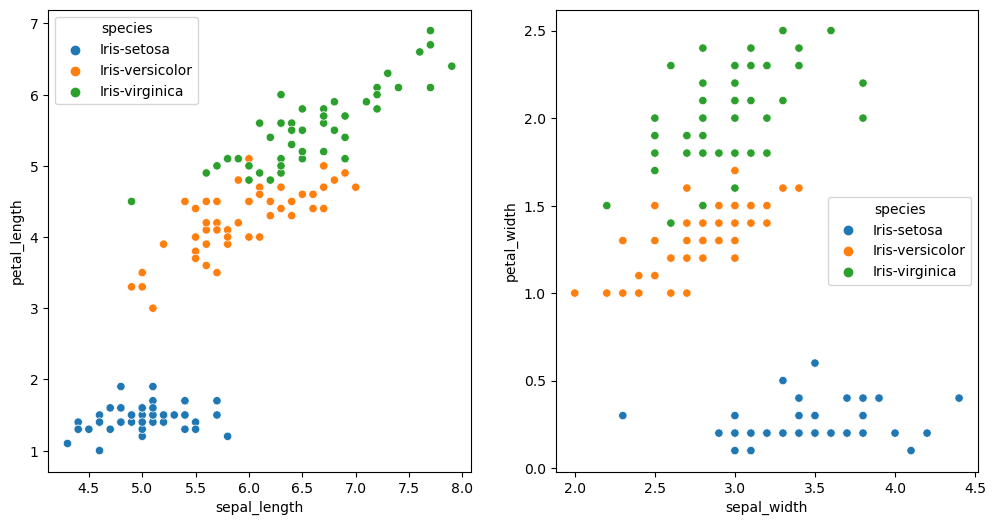

In [48]:
fig, ax =plt.subplots(1,2, figsize=(12, 6))
sns.scatterplot(x = iris_df['sepal_length'], y= iris_df['petal_length'], hue= iris_df['species'], ax =ax[0])
sns.scatterplot(x = iris_df['sepal_width'], y= iris_df['petal_width'], hue= iris_df['species'], ax=ax[1])


From the figure we can see that it seem to be some corrlation between sepal length (width) and petal length (width) for the species Iris-setosa and Iris-versicolor. For the Iris-virginica it does not seems to be a corralation. 

<AxesSubplot:xlabel='species', ylabel='petal_length'>

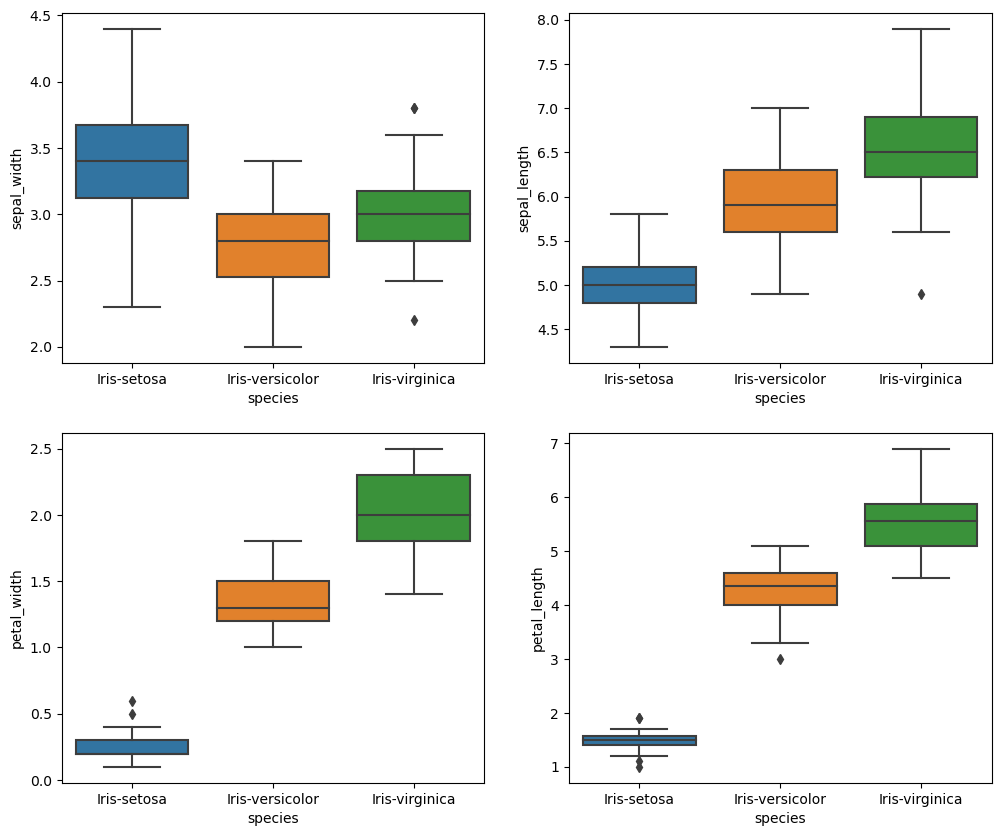

In [49]:
fig, ax =plt.subplots(2,2, figsize=(12, 10))
sns.boxplot( data = iris_df, x = 'species' , y= 'sepal_width', ax =ax[0,0])
sns.boxplot( data = iris_df, x = 'species' , y= 'sepal_length', ax =ax[0,1])
sns.boxplot( data = iris_df, x = 'species' , y= 'petal_width', ax =ax[1,0])
sns.boxplot( data = iris_df, x = 'species' , y= 'petal_length', ax =ax[1,1])

From the above figure we can see that the spread of the petal width and petal lenght for the Iris-setosa is smaller then the other species. We can also see that non of the species seem to have any extreme outliers.

Now, we creat a matrix plot.

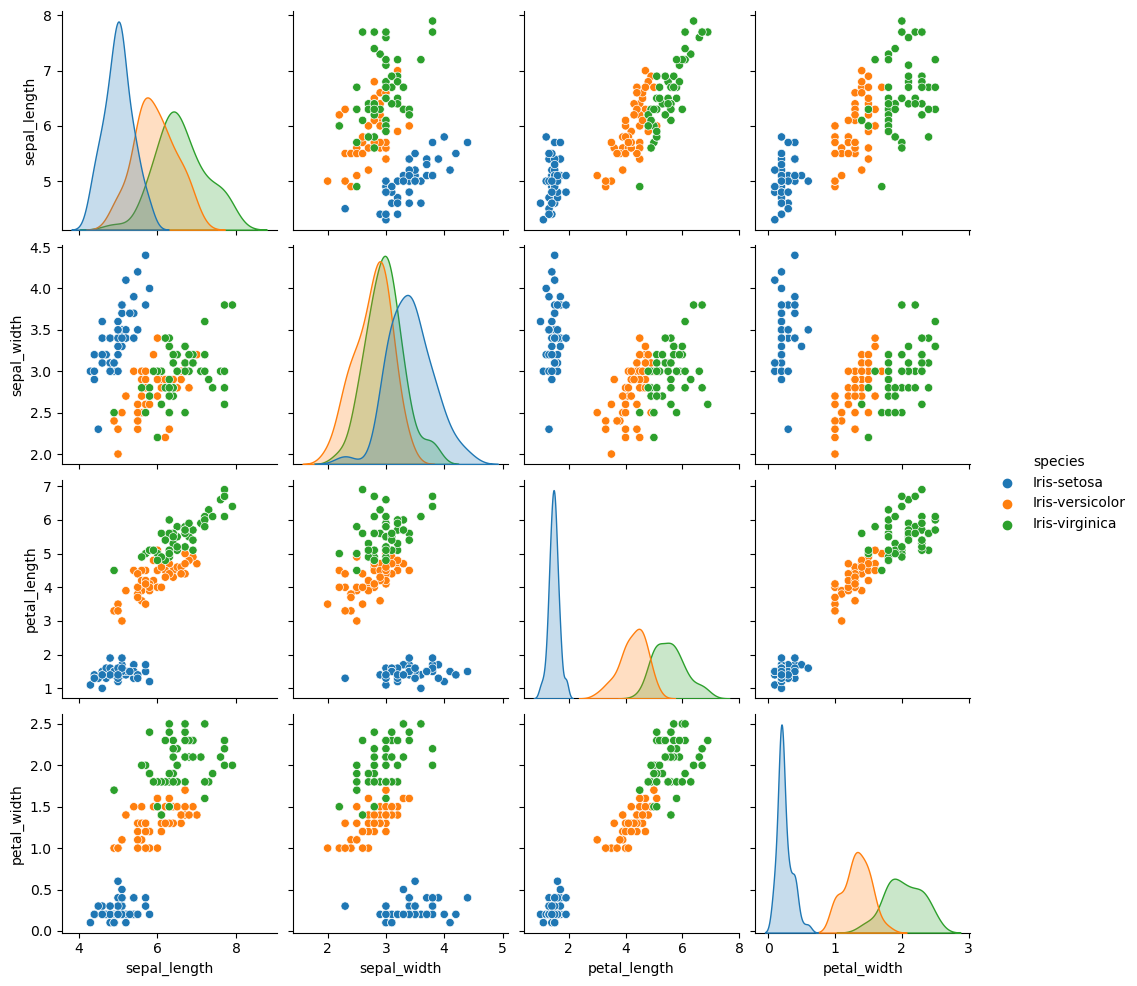

In [50]:
sns.pairplot(iris_df, hue ='species')

From the above figure we see that for all three species petal width and petal length seem to have a linear relation.

## Birdwatching

In [51]:
art_df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/artportalen.csv')

In [52]:
art_df.head()

,Id,Taxonsorteringsordning,Rödlistade,Artnamn,Vetenskapligt namn,Auktor,Antal,Ålder/stadium,Kön,Aktivitet,...,Provins,Församling,Startdatum,Starttid,Slutdatum,Sluttid,Kommentar,Biotop,Rapportör,Observatörer
0,97785066,55235,NaN,Koltrast,Turdus merula,"Linnaeus, 1758",2,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Björn Lindkvist,Björn Lindkvist
1,97785067,54989,NaN,Blåmes,Cyanistes caeruleus,"(Linnaeus, 1758)",2,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Björn Lindkvist,Björn Lindkvist
2,97785310,55235,NaN,Koltrast,Turdus merula,"Linnaeus, 1758",1,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
3,97786982,54735,NaN,Sparvhök,Accipiter nisus,"(Linnaeus, 1758)",1,NaN,hona,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
4,97786985,54944,NaN,Skata,Pica pica,"(Linnaeus, 1758)",2,NaN,NaN,NaN,...,Uppland,Solna,2021-12-30,15:57,2022-01-01,09:36,NaN,NaN,Henrik Spovin,Henrik Spovin


We know that in the column Antal there are some notes "Noterad" and "Ej återfunnen". Because we don't know how many of the birds were observed in that moment we remove those observations. We also make the column into float.

In [53]:
art_df['Antal'] = cleaned_art_df['Antal'].replace(['noterad', 'Ej återfunnen'], np.nan)\
                            .astype(float)
cleaned_art_df = art_df.dropna(subset = ['Antal'])

We disply the top 3 prevelent birds.

In [54]:
top_3 = cleaned_art_df[['Artnamn', 'Antal']]\
        .groupby(['Artnamn'])\
        .sum()\
        .sort_values('Antal', ascending = False)\
        .head(3)
top_3

,Antal
Artnamn,
Grönsiska,20211.0
Sothöna,8308.0
Gräsand,7167.0


From the table above we can read that the top three most prevelant species are Grönsiska, Sothöna and Gräsand.

Now we filter the data frame and only keep those in top 3.

In [55]:
filtered_art_df = cleaned_art_df[cleaned_art_df['Artnamn'].isin(top_3.index)]

filtered_art_df

,Id,Taxonsorteringsordning,Rödlistade,Artnamn,Vetenskapligt namn,Auktor,Antal,Ålder/stadium,Kön,Aktivitet,...,Provins,Församling,Startdatum,Starttid,Slutdatum,Sluttid,Kommentar,Biotop,Rapportör,Observatörer
7,97788369,54006,NaN,Gräsand,Anas platyrhynchos,"Linnaeus, 1758",5.0,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,08:47,2022-01-01,08:47,NaN,NaN,jesper sollerman,jesper sollerman
12,97788374,54222,NaN,Sothöna,Fulica atra,"Linnaeus, 1758",1.0,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,08:48,2022-01-01,08:48,NaN,NaN,jesper sollerman,jesper sollerman
34,97788399,55458,NaN,Grönsiska,Spinus spinus,"(Linnaeus, 1758)",30.0,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,08:49,2022-01-01,09:17,NaN,NaN,jesper sollerman,jesper sollerman
49,97798946,54222,NaN,Sothöna,Fulica atra,"Linnaeus, 1758",1.0,NaN,NaN,födosökande,...,Uppland,Stockholm,2022-01-01,14:04,2022-01-01,14:04,NaN,NaN,Kjell Ljungberg,Kjell Ljungberg
89,97802402,55458,NaN,Grönsiska,Spinus spinus,"(Linnaeus, 1758)",100.0,NaN,NaN,NaN,...,Uppland,Stockholm,2022-01-01,14:02,2022-01-01,14:08,100-150,NaN,Kerstin Nordenadler,Kerstin Nordenadler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21756,101483999,54222,NaN,Sothöna,Fulica atra,"Linnaeus, 1758",2.0,NaN,i par,födosökande,...,Uppland,Solna,2022-06-06,NaN,2022-06-06,NaN,NaN,NaN,Helena Hallgren,Helena Hallgren
21757,101484016,54222,NaN,Sothöna,Fulica atra,"Linnaeus, 1758",2.0,1K,NaN,födosökande,...,Uppland,Solna,2022-06-06,NaN,2022-06-06,NaN,NaN,NaN,Helena Hallgren,Helena Hallgren
21779,101489666,54222,NaN,Sothöna,Fulica atra,"Linnaeus, 1758",10.0,NaN,NaN,permanent revir,...,Uppland,Solna,2022-06-07,06:30,2022-06-07,09:00,NaN,NaN,Karin Oknemark,Karin Oknemark
21829,101494036,54222,NaN,Sothöna,Fulica atra,"Linnaeus, 1758",1.0,NaN,NaN,ruvande,...,Uppland,Solna,2022-06-07,07:30,2022-06-07,09:30,NaN,NaN,Ari Määttä,Ari Määttä


We make a copy of the data frame and extract the months from the datum.

In [56]:
filtered_art_df['Month'] = pd.to_datetime(filtered_art_df['Startdatum']).dt.month

/var/folders/sj/fz9n44sj26bblghntnb8bbrr0000gn/T/ipykernel_60448/125183231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_art_df['Month'] = pd.to_datetime(filtered_art_df['Startdatum']).dt.month


We now group by art and month and then plot month against amount for each bird.

In [57]:
grouped_top3= filtered_art_df[['Artnamn', 'Antal', 'Month']]\
                .groupby(['Artnamn', 'Month'])\
                .sum()\
                .reset_index()

<AxesSubplot:xlabel='Month', ylabel='Antal'>

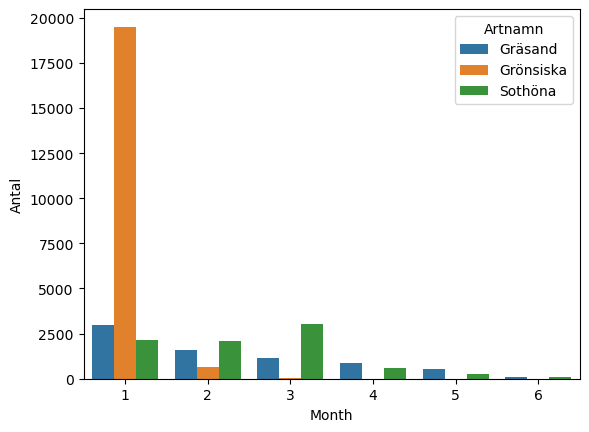

In [58]:
sns.barplot(y='Antal', x = 'Month', hue = 'Artnamn', data = grouped_top3)

From the plot above we can see that each bird is only observed in the first half of the year and that they decrease after January, except for Sothöna that has its peak in March and then decreases.

Now we want to see which birds are the rarest.

In [59]:
rare = cleaned_art_df[['Artnamn', 'Antal']]\
        .groupby(['Artnamn'])\
        .sum()\
        .sort_values('Antal')

rare.loc[rare['Antal']==1]

,Antal
Artnamn,
Strömstare,1.0
Trädlärka,1.0
Tornfalk,1.0
Rödbena,1.0
Varfågel,1.0
Gravand,1.0
Forsärla,1.0
Fjällvråk,1.0
Spillkråka,1.0


In the list above we can see that the rarest birds have been spotted once.

Now we want to know which municipality have observed most birds.

In [60]:
grouped_art_df = cleaned_art_df[['Kommun', 'Antal']]\
                .groupby('Kommun')\
                .sum()\
                .sort_values('Antal', ascending= False)
grouped_art_df

,Antal
Kommun,
Stockholm,92561.0
Solna,15361.0
Sollentuna,6434.0
Lidingö,1439.0


From the above table we can see that Stockholm have most observed birds.

We now want to answer the question: which rapportör has seen most birds?

In [61]:
top1_resports = cleaned_art_df[['Rapportör', 'Antal']]\
            .groupby('Rapportör')\
            .sum()\
            .sort_values('Antal', ascending = False)\
            .head(1)
top1_resports

,Antal
Rapportör,
Svante Söderholm,50079.0


So, Svante Söderholm is the rapportör who has seen most birds. 

Lastly, we want to know what the birds are doing when humans spot them.

In [62]:
activity = cleaned_art_df[['Artnamn', 'Aktivitet', 'Antal']]\
            .groupby('Aktivitet')\
            .sum()\
            .sort_values('Antal', ascending = False)\
            .head()

activity

,Antal
Aktivitet,
rastande,51917.0
födosökande,10794.0
förbiflygande,7986.0
spel/sång,7617.0
"obs i häcktid, lämplig biotop",5194.0


From the above table we can see that most observed birds are doing the activity "rastande".

From these questions and answers one can gain insights such as which municipalities have a hospitable environment for birds, who is most active in the bird watching community and determine common activities for birds.

## Predicting Strokes

In [63]:
strokes_df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv')

We start by getting an overview of the columns and data type.

In [64]:
strokes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


From this output we can see that the columns have different data type. And that BMI is the only column that have cells with value Nan. However, the other columns can have missing data but it is noted in a different way.

To get an quick overview of the data we can look at the first five rows. 

In [65]:
strokes_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


From the table above we can guess that hypertension, hear disease and stroke is binary. To check if this is correct we can do a histogram.

From the table below we can see that age seems to be widly spread with mean 43 years old.

In [66]:
strokes_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


To get an overview of the distribution of some of the variables we do histograms this also gives us insight whether the data is balanced or not.

<AxesSubplot:xlabel='smoking_status', ylabel='Count'>

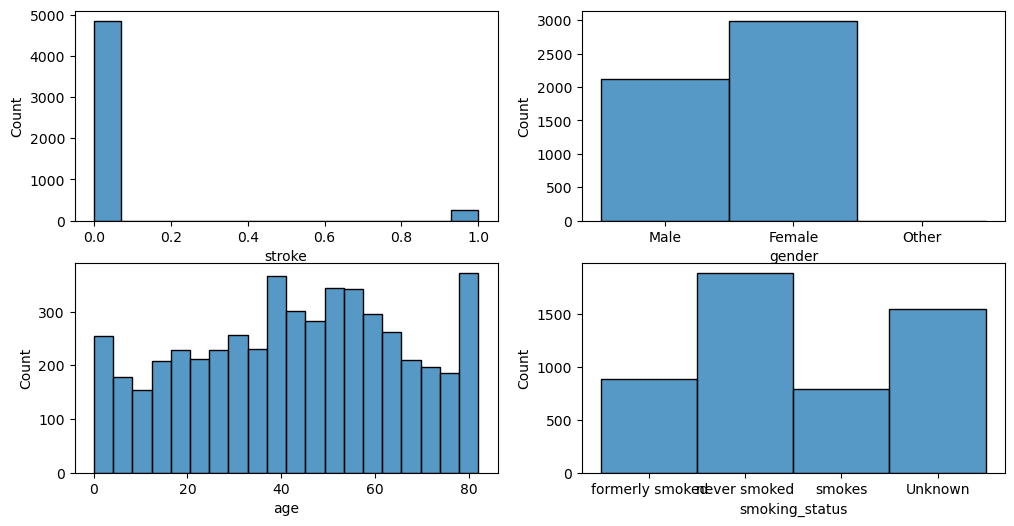

In [67]:
fig, ax =plt.subplots(2,2, figsize=(12, 6))
sns.histplot(strokes_df['stroke'], ax= ax[0,0])
sns.histplot(strokes_df['gender'], ax= ax[0,1])
sns.histplot(strokes_df['age'], ax= ax[1,0])
sns.histplot(strokes_df['smoking_status'], ax = ax[1,1])

From the plots above we can see that strokes are very unbalanced but that gender, age and smoking status seems to be fairly balanced. However, we can see that it is relativly many were the smoking status is unknown (which we did not see in the first overview). We can also see that our previusly guess that strokes are binary seems to be true. 

Three questions that give you insight is:
1. Does age have an impact on strokes occurence?
2. Is it more common for men to have a stroke?
3. What is the average number of strokes for those who have a hear disease?

Because age seems to be balanced we can do a bar plot of age and strokes.

<AxesSubplot:xlabel='age_groups'>

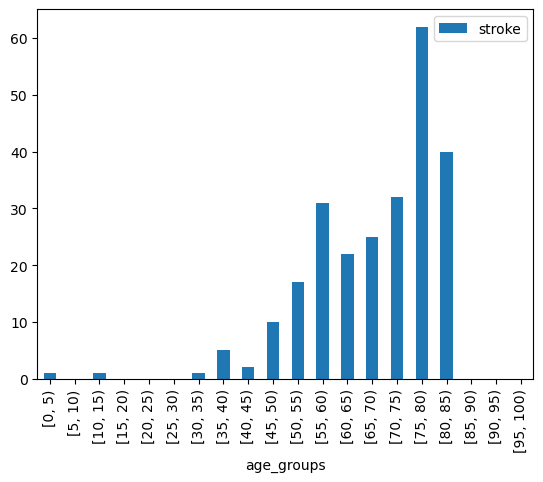

In [68]:
strokes_df['age_groups'] = pd.cut(strokes_df['age'], bins = range(0,101,5), right = False)

relevent_strokes_df = strokes_df[['age_groups', 'stroke']]
relevent_strokes_df.groupby('age_groups').sum().plot.bar()

From the above figure we can see that age seems to have an impact on strokes occurence. We now want to answer the second question, is it more common for men to have a stroke? Even if gender is some what balanced there is a few more females in the data, because of this we do a bar plot of the averege number of strokes per male and female.

<AxesSubplot:xlabel='gender'>

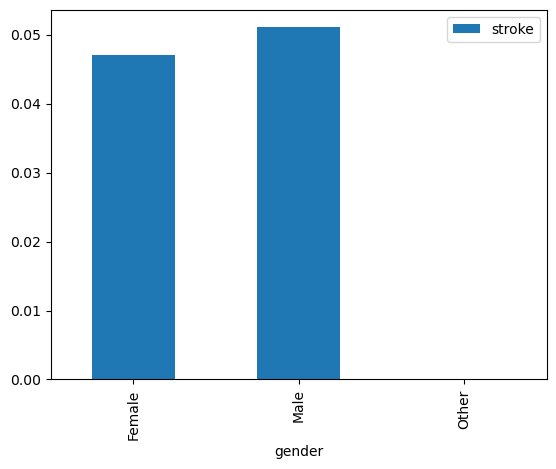

In [69]:
strokes_df[['gender', 'stroke']].groupby('gender').mean().plot.bar()

From the plot above we can see that the average number of strokes per men are slightly higher than for females. This can indicate that it is more common for men to have a stroke. Now we calculate the average value of strokes for people with heart disease.

In [70]:
strokes_df[['heart_disease', 'stroke']].groupby('heart_disease').mean()

,stroke
heart_disease,
0,0.041787
1,0.170290


From the table above we can see that the average number of strokes for those with heart disease is higher than for those who don't have a heart disease. This gives us the insight that it is a higher risk for someone with heart disease to have a stroke.

## Cleaning data

In [71]:
cell_df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/cell_phones_total.csv')

We start by getting an overview of the data type.

In [72]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso-3   214 non-null    object 
 1   1960    200 non-null    float64
 2   1965    200 non-null    float64
 3   1966    0 non-null      float64
 4   1967    0 non-null      float64
 5   1968    0 non-null      float64
 6   1969    0 non-null      float64
 7   1970    200 non-null    float64
 8   1971    0 non-null      float64
 9   1972    0 non-null      float64
 10  1973    0 non-null      float64
 11  1974    0 non-null      float64
 12  1975    200 non-null    float64
 13  1976    200 non-null    float64
 14  1977    200 non-null    float64
 15  1978    200 non-null    float64
 16  1979    200 non-null    float64
 17  1980    200 non-null    object 
 18  1981    199 non-null    object 
 19  1982    199 non-null    object 
 20  1983    198 non-null    object 
 21  1984    196 non-null    object 
 22  19

In [73]:
cell_df.head()

,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,132k,NaN,135k,139k,140k,141k,NaN,NaN,NaN,NaN
1,AFG,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,10.2M,13.8M,15.3M,16.8M,18.4M,19.7M,21.6M,23.9M,22M,22.6M
2,AGO,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,9.4M,12.1M,12.8M,13.3M,14.1M,13.9M,13M,13.3M,13.3M,14.8M
3,ALB,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,2.69M,3.1M,3.5M,3.69M,3.36M,3.4M,3.37M,3.63M,2.71M,2.63M
4,AND,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,65.5k,65k,63.9k,63.9k,66.2k,71.3k,76.1k,80.3k,82.6k,87.9k


After a quick look at the data we can see that the amount of cell phones seem to be zero until at least the year 1970. For the years after 2010 the amount of cell phones seem to increase for each year. Because of this we choose to forward fill so that the amount of cell phones is at least the same as the year before. If there is missing data in the year 1960 we choose to set it as zero.

In [74]:
for cell in range(len(cell_df)):
    if np.isnan(cell_df.loc[cell,'1960']):
        cell_df.loc[cell,'1960'] = 0.0

cleaned_cell_df = cell_df.fillna(method='ffill', axis= 1)
cleaned_cell_df

,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132k,132k,135k,139k,140k,141k,141k,141k,141k,141k
1,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.2M,13.8M,15.3M,16.8M,18.4M,19.7M,21.6M,23.9M,22M,22.6M
2,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.4M,12.1M,12.8M,13.3M,14.1M,13.9M,13M,13.3M,13.3M,14.8M
3,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.69M,3.1M,3.5M,3.69M,3.36M,3.4M,3.37M,3.63M,2.71M,2.63M
4,AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65.5k,65k,63.9k,63.9k,66.2k,71.3k,76.1k,80.3k,82.6k,87.9k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,XKX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,562k,562k,562k,562k,562k,562k,562k,562k,562k,562k
210,YEM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.1M,11.7M,13.9M,16.8M,17.1M,15M,16.4M,15.4M,15.3M,15.3M
211,ZAF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.4M,64M,68.4M,76.9M,79.3M,88M,82.4M,88.5M,92.4M,97M
212,ZMB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.45M,8.16M,10.5M,10.4M,10.1M,11.6M,12M,13.4M,15.5M,17.2M


Now we change k, M and B to e^3, e^6 and e^9 respectivly and change the type to float.

In [75]:
cleaned_cell_df.iloc[:,1:] = cleaned_cell_df.iloc[:,1:]\
    .replace({'k' :'e3', 'M' : 'e6', 'B': 'e9'}, regex = True)\
    .astype(float)


Below we creat the table mentioned in the assignment.

In [76]:
cleaned_cell_df[['iso-3','2015','2016', '2017', '2018', '2019']].sort_values('2015', ascending=False).head()

,iso-3,2015,2016,2017,2018,2019
35,CHN,1290000000.0,1360000000.0,1470000000.0,1650000000.0,1730000000.0
87,IND,1000000000.0,1130000000.0,1170000000.0,1180000000.0,1150000000.0
200,USA,382000000.0,396000000.0,400000000.0,422000000.0,422000000.0
86,IDN,339000000.0,386000000.0,435000000.0,319000000.0,345000000.0
26,BRA,258000000.0,244000000.0,218000000.0,207000000.0,207000000.0
